# MNIST Hyperparameter Tuning Analysis

This notebook analyzes the results of various hyperparameter tuning experiments for a feedforward neural network trained on the MNIST dataset. It focuses on evaluating how different configurations (e.g., mini-batch size, architecture, regularization type, lambda values, learning rate scheduling) affect training dynamics, evaluation accuracy, and cost.

### Notebook Features

- Loads model training histories (from JSON) and summary results (from CSV)
- Visualizes cost and accuracy curves over epochs
- Compares different model settings and tuning strategies (e.g., `with_lr_schedule` vs `no_lr_schedule`)
- Highlights the impact of regularization type, learning rate, and architecture
- Aids in selecting the best-performing configuration for final evaluation

In [1]:
# Libraries 
import pandas as pd
import os
import sys
import json
import matplotlib.pyplot as plt

# Add local src/ folder to path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(os.path.join(project_root, "src"))

from common_utils import *

In [2]:
# Load the results  
eta_results_path = os.path.join(project_root, "results", "hyperParamTuning_mnist_1_eta_summary.csv")
# print(eta_results_path)
eta_results = pd.read_csv(eta_results_path)

print(eta_results)

    eta  eval_accuracy  eval_cost
0  0.50           9618   0.293845
1  0.10           9640   0.279204
2  0.05           9579   0.295595
3  0.01           9409   0.423548



**Choice of Initial η = 0.1**  

- η = 0.1 achieves the **lowest cost (0.279204)** and **highest accuracy (9640)** in our evaluation data. 


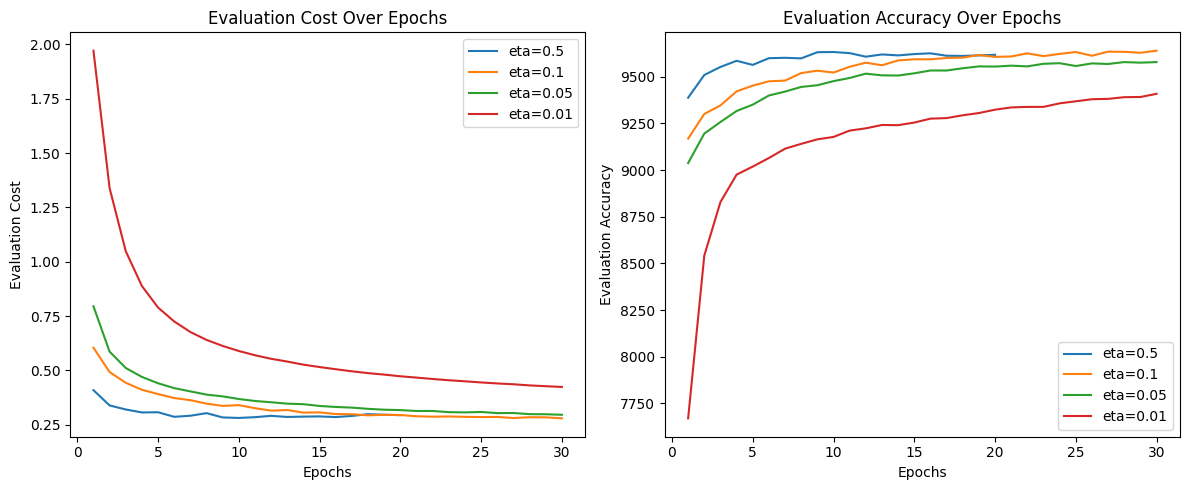

In [3]:
# Path to your JSON file
json_path = os.path.join(project_root, "results", "hyperParamTuning_mnist_1_eta_detailed.json")  

# Load JSON content into a Python list/dict
with open(json_path, "r") as f:
    eta_history = json.load(f)

# Plot the evaluation metrics across different learning rates
plot_eval_metrics_from_json(eta_history, label_keys=["eta"])

In [4]:
# Load the results  
bs_results_path = os.path.join(project_root, "results", "hyperParamTuning_mnist_2_bs_summary.csv")
# print(eta_results_path)
bs_results = pd.read_csv(bs_results_path)

print(bs_results)

   batch_size  eval_accuracy  eval_cost
0          10           9629   0.286084
1          20           9629   0.266148
2          50           9595   0.293710
3         100           9543   0.344839


Choise of batch size: 20

- 20 achieves the **lowest cost (0.266)** and highest accuracy (9629) in the evaluation data. 

- Larger batch size (e.g., 100) leads to smoother and stable gradients. But it also leads to slower convergence due to fewer updates. And it may generalize worse or get stuck in sharp minima. 

- Smaller batch size (e.g., 10) leads to more noisy gradients. But it also leads to faster convergence. It may generalize better. 


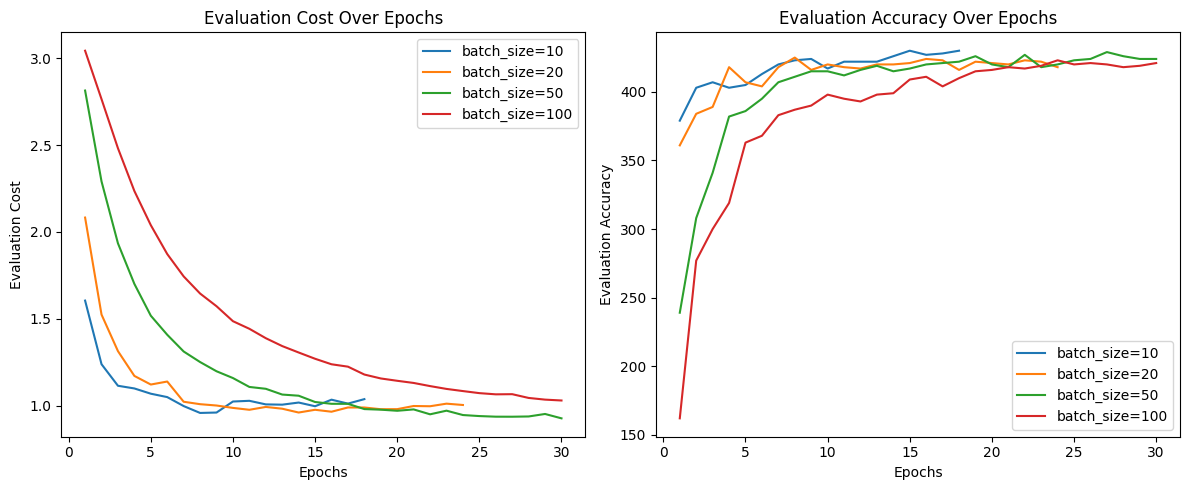

In [9]:
# Path to your JSON file
json_path = os.path.join(project_root, "results", "hyperParamTuning_mnist_2_bs_detailed.json")  

# Load JSON content into a Python list/dict
with open(json_path, "r") as f:
    bs_history = json.load(f)

# Plot the evaluation metrics across different batch sizes
plot_eval_metrics_from_json(bs_history, label_keys=["batch_size"])

In [5]:
# Load the results  
reg_results_path = os.path.join(project_root, "results", "hyperParamTuning_mnist_3_regularizer_summary.csv")
reg_results = pd.read_csv(reg_results_path)
print(reg_results)


  regularization_type  lambda  eval_accuracy  eval_cost
0                 NaN    0.00           9620   0.280939
1                  l1    0.01           1064   3.250643
2                  l1    0.10           1064   3.251057
3                  l1    1.00           1064   3.250762
4                  l2    0.01           9632   0.262246
5                  l2    0.10           9632   0.268474
6                  l2    1.00           9642   0.263880


Our results show that **L2 regularization** with λ = 1 achieves the highest accuracy (9642) in the evaluation data. 

L1 regularization resulted in extremely poor performance, likely due to over-aggressive sparsity in a shallow model.

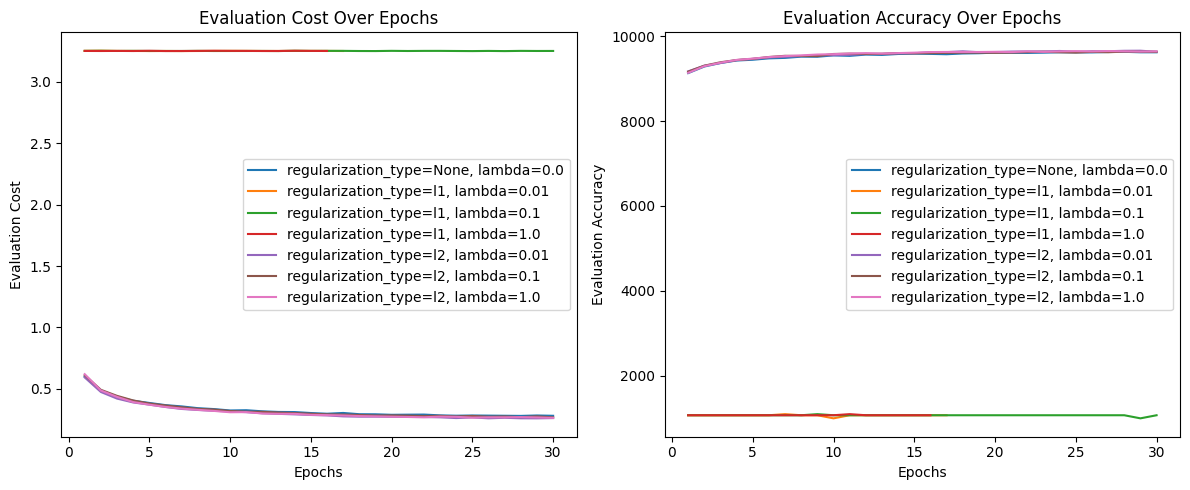

In [6]:
# Path to your JSON file
json_path = os.path.join(project_root, "results", "hyperParamTuning_mnist_3_regularizer_detailed.json")  

# Load JSON content into a Python list/dict
with open(json_path, "r") as f:
    reg_history = json.load(f)

# Plot the evaluation metrics across different regularization types and lambdas
plot_eval_metrics_from_json(reg_history, label_keys=['regularization_type', 'lambda'])

In [8]:
# Load the results  
arch_results_path = os.path.join(project_root, "results", "hyperParamTuning_mnist_4_architecture_summary.csv")
arch_results = pd.read_csv(arch_results_path)
print(arch_results)



          architecture  eval_accuracy  eval_cost
0        [784, 32, 10]           9655   0.259306
1        [784, 64, 10]           9752   0.188725
2       [784, 128, 10]           9787   0.157926
3    [784, 64, 64, 10]           9761   0.175397
4   [784, 128, 64, 10]           9785   0.144708
5  [784, 128, 128, 10]           9789   0.150880


I selected [784, 128, 128, 10] as the optimal architecture since it achieved the highest evaluation accuracy (9789) on the validation set. Although [784, 128, 64, 10] had a slightly lower evaluation cost, the gain in accuracy from the larger hidden layer outweighs the marginal increase in cost. 

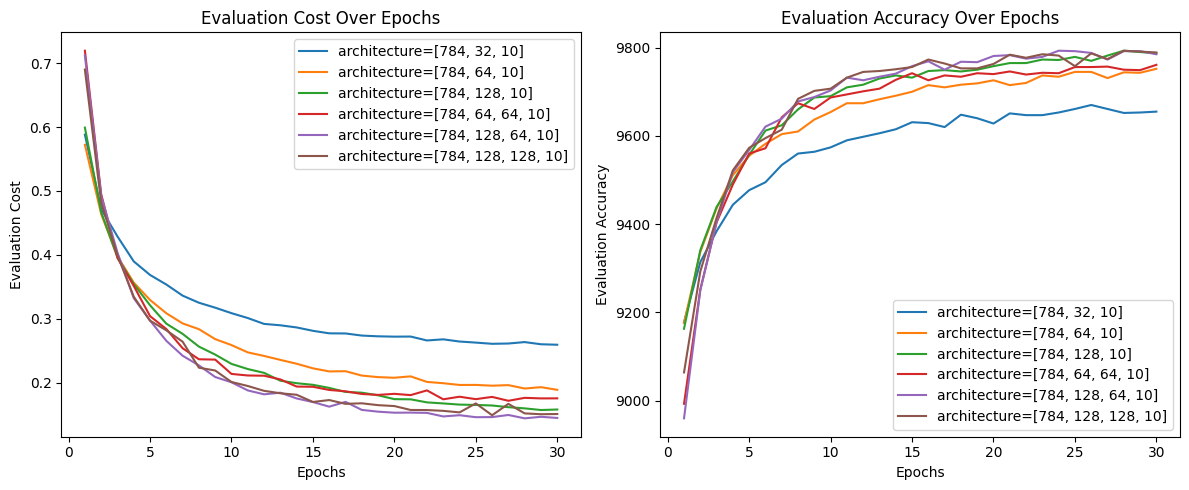

In [9]:
# Path to your JSON file
json_path = os.path.join(project_root, "results", "hyperParamTuning_mnist_4_architecture_detailed.json")  

# Load JSON content into a Python list/dict
with open(json_path, "r") as f:
    arch_history = json.load(f)

# Plot the evaluation metrics across different architectures
plot_eval_metrics_from_json(arch_history, label_keys=['architecture'])

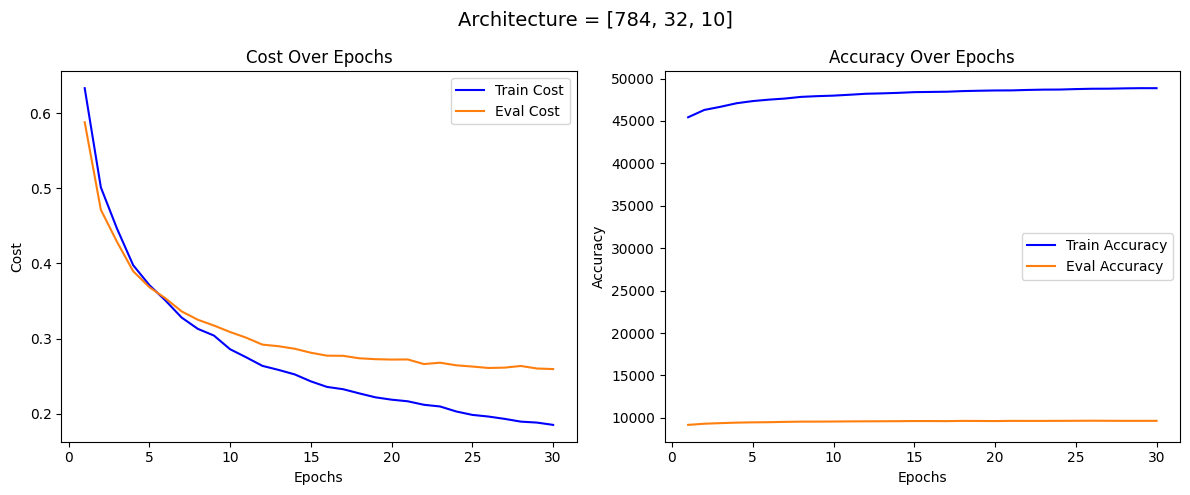

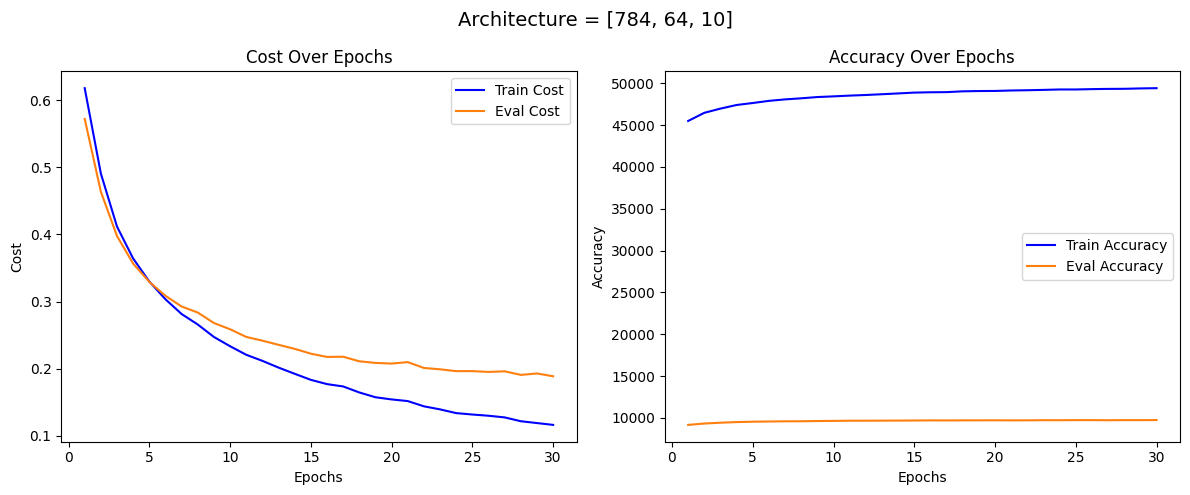

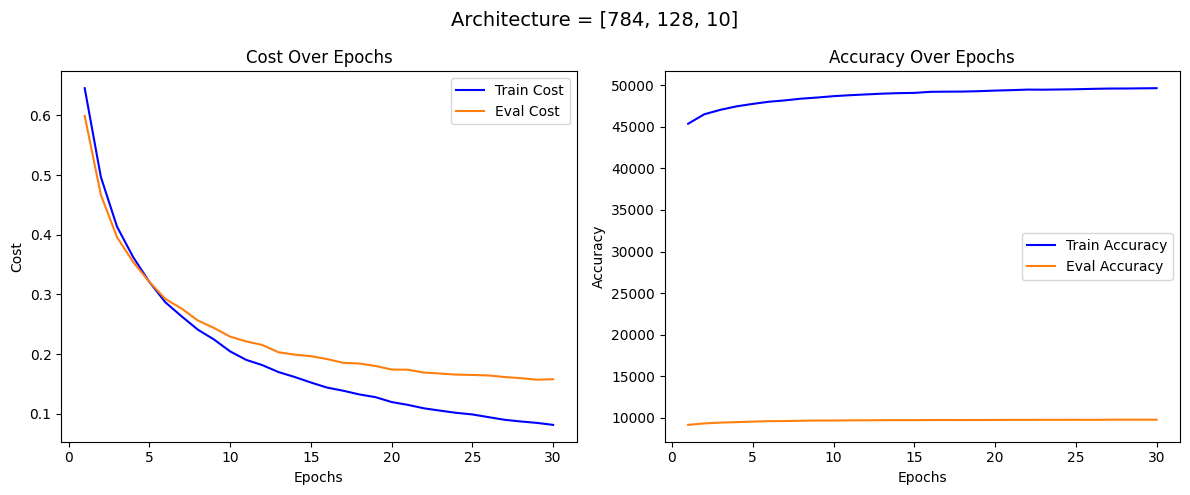

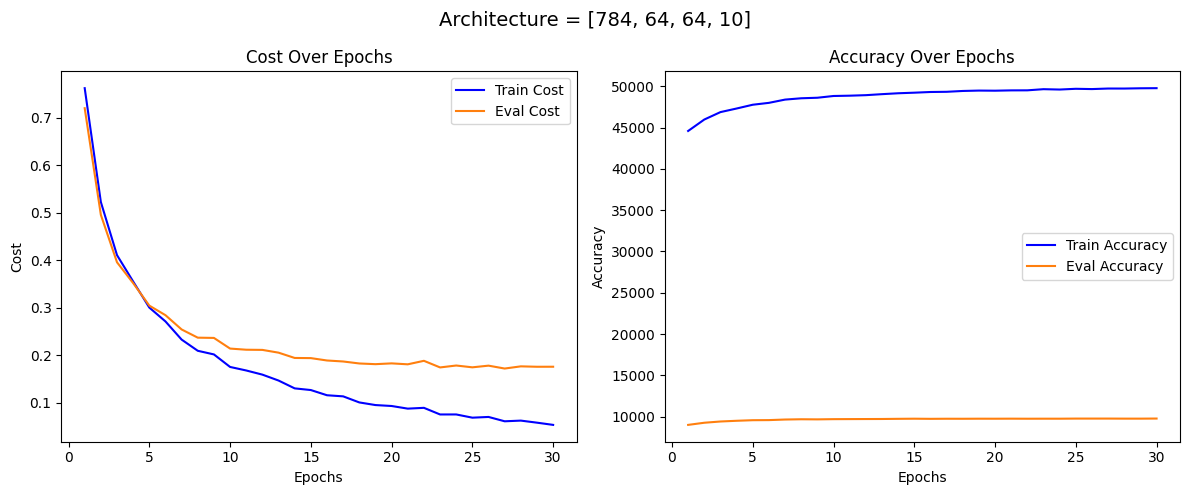

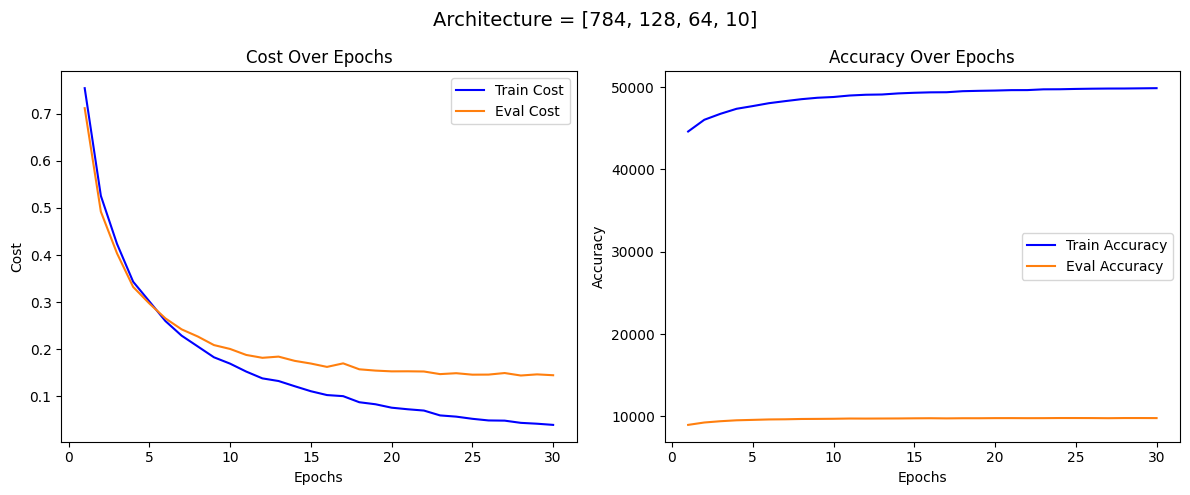

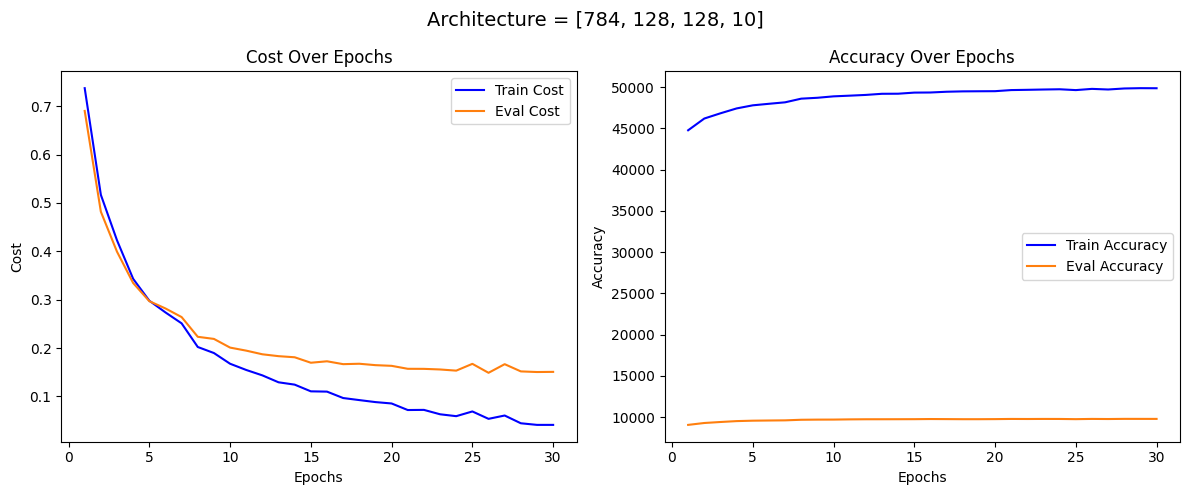

In [10]:
for entry in arch_history:
    arch = entry.get("architecture", "N/A")
    title = f"Architecture = {arch}"
    plot_train_eval_history(entry, title=title) 

In [17]:
# Load the results  
lr_final_results_path = os.path.join(project_root, "results", "hyperParamTuning_mnist_5_lr_final_summary.csv")
lr_final_results = pd.read_csv(lr_final_results_path)
print(lr_final_results)


            setting  eval_accuracy  eval_cost  test_accuracy  test_cost
0    no_lr_schedule           9785   0.151143           9794   0.145921
1  with_lr_schedule           9808   0.149466           9798   0.146527


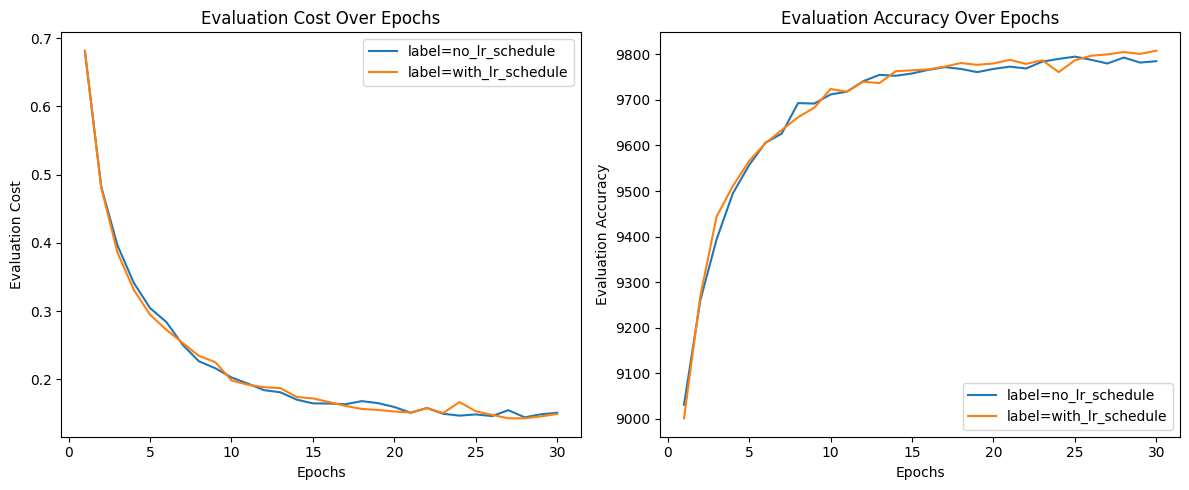

In [18]:
# Path to your JSON file
json_path = os.path.join(project_root, "results", "hyperParamTuning_mnist_5_lr_final_detailed.json")  

# Load JSON content into a Python list/dict
with open(json_path, "r") as f:
    lr_final_history = json.load(f)

# Plot the evaluation metrics across different architectures
plot_eval_metrics_from_json(lr_final_history, label_keys=['label'])


### Final Neural Network Hyperparameter Tuning Summary (MNIST)

After sequential tuning and rigorous evaluation on the MNIST dataset, the following hyperparameters were selected for the final model:

| Hyperparameter       | Value             |
|----------------------|------------------|
| Architecture         | [784, 128, 128, 10] |
| Learning Rate (η)    | 0.1              |
| Mini-Batch Size      | 20               |
| Regularization Type  | L2               |
| Lambda (λ)           | 1.0              |
| Epochs               | 30               |
| Early Stopping       | Patience = 10    |


#### Learning Rate Scheduling Comparison

| Setting           | Eval Accuracy | Eval Cost | Test Accuracy | Test Cost |
|------------------|---------------|-----------|----------------|-----------|
| No LR Schedule   | 97.85%     | 0.1511    | 97.94%         | 0.1459 |
| With LR Schedule | 98.08%        | 0.1495| 97.98%         | 0.1465    |

- **Observation**:
  - **Both configurations perform comparably well**, with slight trade-offs:
    - Without LR scheduling slightly favors **lower test cost**.
    - With LR scheduling slightly improves **final test accuracy**.

- **Conclusion**:
  - Learning rate scheduling **did not significantly outperform** the constant learning rate in this setting.
  - However, the **performance is robust** under both settings, validating the quality of the tuned parameters.


#### Final Recommendation

- The tuned architecture and hyperparameters provide **strong generalization and stable learning**.
- Either model is acceptable for deployment or further experiments.
- If **test accuracy is prioritized**, use learning rate scheduling.
- If **stability and lower loss** are preferred, omit the scheduler.
